In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\dhire\Documents\Machine_learning_Inuron\ML_Live_Class\data\gene_expression.csv")

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

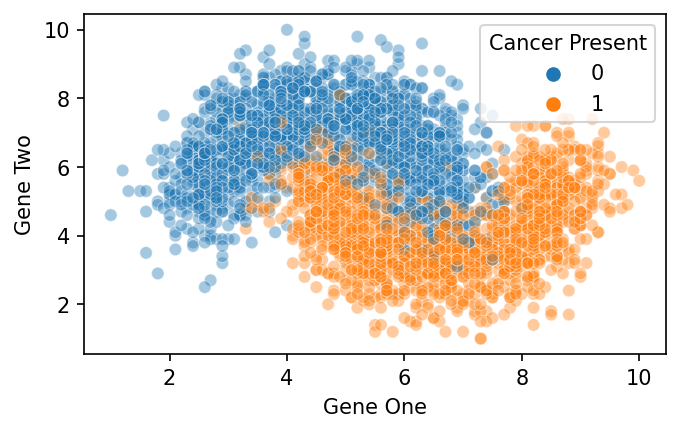

In [7]:
plt.figure(figsize=(5,3),dpi=150)
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.4)

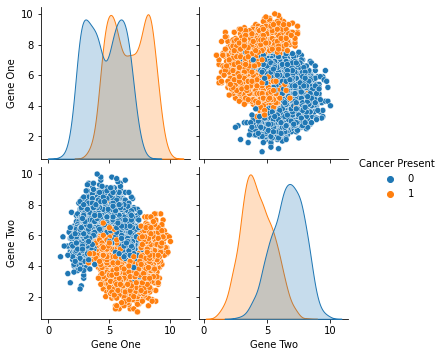

In [9]:
sns.pairplot(data=df,hue='Cancer Present')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
scalar=StandardScaler()

In [12]:
x=df.drop('Cancer Present',axis=1)

In [13]:
y=df['Cancer Present']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [16]:
scaled_x_train=scalar.fit_transform(x_train)

In [17]:
scaled_x_test=scalar.transform(x_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [20]:
knn_model.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred=knn_model.predict(scaled_x_test)

In [22]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], d

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
confusion_matrix(y_test,y_pred)

array([[149,  14],
       [ 17, 120]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       163
           1       0.90      0.88      0.89       137

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



#### Choosing the value of Kn in KNN

In [ ]:
## elbow method

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
test_error_rate=[]

for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    y_pred_test=knn_model.predict(scaled_x_test)
    test_error=1-accuracy_score(y_test,y_pred_test)
    test_error_rate.append(test_error)
test_error_rate
    

[0.10333333333333339,
 0.10333333333333339,
 0.06999999999999995,
 0.07999999999999996,
 0.07666666666666666,
 0.07999999999999996,
 0.06999999999999995,
 0.07333333333333336,
 0.05666666666666664,
 0.06333333333333335,
 0.06666666666666665,
 0.05666666666666664,
 0.06000000000000005,
 0.06000000000000005,
 0.06333333333333335,
 0.06000000000000005,
 0.06666666666666665,
 0.06000000000000005,
 0.06333333333333335,
 0.06666666666666665,
 0.06333333333333335,
 0.06666666666666665,
 0.06333333333333335,
 0.06333333333333335,
 0.06333333333333335,
 0.06333333333333335,
 0.06000000000000005,
 0.06000000000000005,
 0.06333333333333335]

Text(0, 0.5, 'error rate')

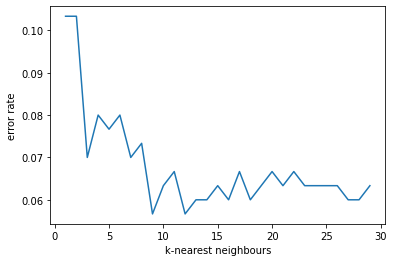

In [30]:
sns.lineplot(x=range(1,30),y=test_error_rate)
plt.xlabel("k-nearest neighbours")
plt.ylabel("error rate")

In [31]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 29,
 'p': 2,
 'weights': 'uniform'}

In [32]:
### grid search using pipeline

In [58]:
operations =[('scalar',scalar),('knn',knn_model)]

In [76]:
from sklearn.pipeline import Pipeline

In [77]:
pipe=Pipeline(operations)

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
k_values=list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [80]:
param_grid={'knn__n_neighbors':k_values,'knn__metric':['euclidean']}

In [81]:
full_cv_classifiers=GridSearchCV(pipe,param_grid,scoring='accuracy',cv=5)

In [82]:
full_cv_classifiers.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=29))]),
             param_grid={'knn__metric': ['euclidean'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [83]:
full_cv_classifiers.best_estimator_.get_params()

{'memory': None,
 'steps': [('scalar', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=15))],
 'verbose': False,
 'scalar': StandardScaler(),
 'knn': KNeighborsClassifier(metric='euclidean', n_neighbors=15),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'euclidean',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 15,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [84]:
full_pred=full_cv_classifiers.predict(x_test)

In [85]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       163
           1       0.95      0.91      0.93       137

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300

